In [126]:
import os , sys
datapath   = "..\\"
print('datapath is set to %s'%datapath)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
sys.path.insert(0, os.path.join(datapath,'PythonScripts'))
#from Loobos_Toolbox import Read_LoobosEddFinal, Read_LooStor, Read_LoodatGapfill, Read_Loobos_halfhourly, Read_Loobos_meteo, Read_Loobos_soil, Read_Loobos_profile
#from Loobos_Toolbox_Dendro_Grwater

datapath is set to ..\


In [2]:
#my own functions
from Loobos_Toolbox_Dendro_Grwater import Read_Dendrometers,notmatch

## Import Dendrometer data

### populate dataframes

In [127]:
start='2022-04-01 00:00:00'
end='2022-09-30 00:00:00'

#point dendrometer, not band! 
df_dendro_I5_pt = pd.read_csv(datapath+'Loobos_dendrometers\I5_point.csv',sep=",",index_col=False)
df_dendro_I5_pt['datetime']=pd.to_datetime(df_dendro_I5_pt['jr2022'], format= '%Y-%m-%d %H:%M:%S')
df_dendro_I5_pt.index = df_dendro_I5_pt['datetime']
#df_dendro_I5_pt.loc[start:end,'groei'].plot()

## band dendrometer
df_dendro_I5 = pd.read_csv(datapath+'Loobos_dendrometers\I5.csv',sep=",",index_col=False)
df_dendro_I5['datetime']=pd.to_datetime('2022-'+df_dendro_I5['groeiseizoen'], format= '%Y-%m-%d %H:%M')
df_dendro_I5.index = df_dendro_I5['datetime']
#df_dendro_I5.loc[start:end,'jr2022'].plot()

df_dendro_both = pd.concat([df_dendro_I5['jr2022'],df_dendro_I5_pt['groei']],axis=1,sort=False)

In [143]:
df_dendro_both=df_dendro_both.rename(columns={'jr2022':'circ_data','groei':'rad_data'})
df_dendro_both['rad_data_mm']=df_dendro_both['rad_data']/1000
df_dendro_both['equiv_circ_delta']=df_dendro_both['rad_data_mm']*2*np.pi

df_dendro_both['equiv_rad_delta']=df_dendro_both['circ_data']/(2*np.pi)
df_dendro_both['equiv_rad_delta_um']=df_dendro_both['equiv_rad_delta']*1000
#df_dendro_both

### visual check plots

<Axes: title={'center': 'punt-dendrometer (radius)'}, xlabel='datetime', ylabel='straaltoename ($\\mu m)$'>

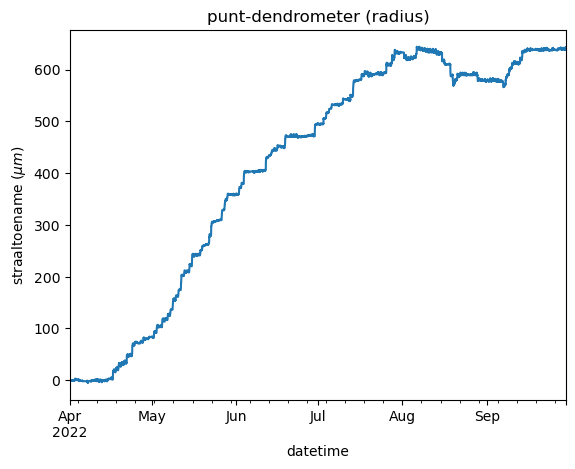

In [144]:
df_dendro_both.loc[start:end,'rad_data'].dropna().plot(title="punt-dendrometer (radius)",ylabel=r"straaltoename ($\mu m)$")

<Axes: title={'center': 'band-dendrometer (circumf)'}, xlabel='datetime', ylabel='omtrektoename (mm)'>

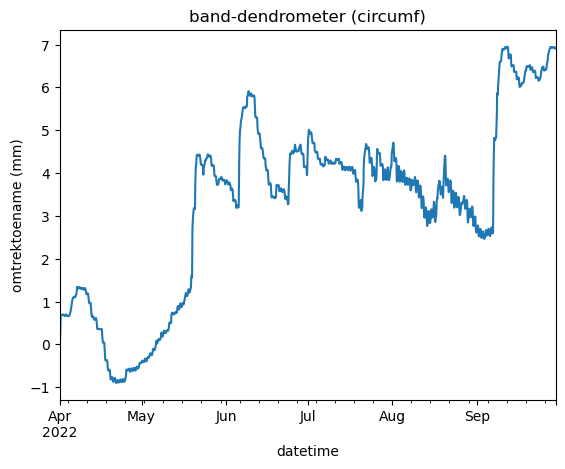

In [146]:
df_dendro_both.loc[start:end,'circ_data'].dropna().plot(title="band-dendrometer (circumf)",ylabel="omtrektoename (mm)")

<Axes: title={'center': 'straal-toename punt en omgerekende band'}, xlabel='datetime', ylabel='straaltoename ($\\mu m)$'>

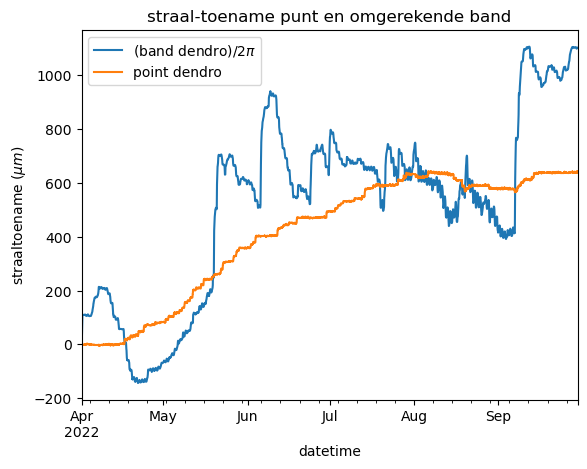

In [140]:
df_dendro_both.loc[start:end,'equiv_rad_delta_um'].dropna().plot(title="straal-toename punt en omgerekende band",ylabel=r"straaltoename ($\mu m)$",label=r"(band dendro)/2$\pi $",legend='yes')
df_dendro_both.loc[start:end,'rad_data'].dropna().plot(title="straal-toename punt en omgerekende band",ylabel=r"straaltoename ($\mu m)$",label="point dendro",legend='yes')

<Axes: title={'center': 'band-dendrometer (radius)'}, xlabel='datetime', ylabel='straaltoename ($\\mu m)$'>

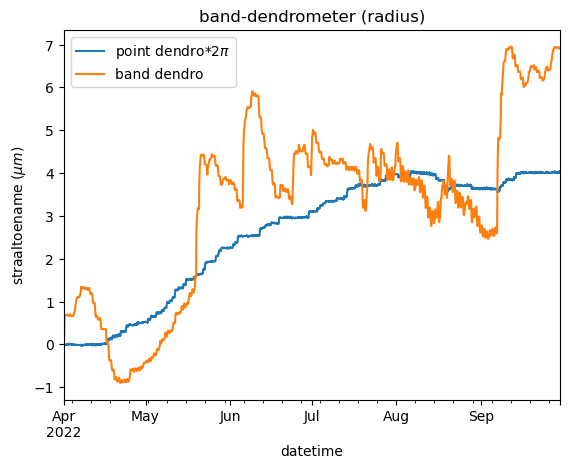

In [137]:
df_dendro_both.loc[start:end,'equiv_circ_delta'].dropna().plot(title="band-dendrometer (radius)",ylabel=r"straaltoename ($\mu m)$",label=r"point dendro*2$\pi $",legend='yes')
df_dendro_both.loc[start:end,'circ_data'].dropna().plot(title="band-dendrometer (radius)",ylabel=r"straaltoename ($\mu m)$",label="band dendro",legend='yes')

In [141]:
#df_dendro_I5_pt.loc[start:end,'groei'].plot(title="punt-dendrometer (radius)",ylabel=r"straaltoename ($\mu m)$")


In [142]:
#df_dendro_I5.loc[start:end,'jr2022'].plot(title="Band-dendrometer (circumference)",ylabel="omtrekstoename (mm)")